In [1]:
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
import matplotlib.pyplot as plt
from PIL import Image

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 256 * 256, 128)  # Input size should be 3*256*256 (channels * height * width)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output layer for binary classification
        self.softmax = nn.Softmax(dim=1)  # For multi-class classification, it's better to use softmax

    def forward(self, x):
        x = x.view(-1, 3 * 256 * 256)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))  # Apply softmax to the final output
        return x



In [2]:
model=SimpleNN()
model.load_state_dict(torch.load("binary_classification_model.pth"))
model.eval()

C:\Users\jaher5\AppData\Local\Temp\ipykernel_15076\1446384607.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("binary_classification_mod

SimpleNN(
  (fc1): Linear(in_features=196608, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [3]:
transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [4]:
image_path="DD.jpg"
image=Image.open(image_path)

In [5]:
input_tensor=transform(image).unsqueeze(0)
print(input_tensor.shape)


torch.Size([1, 3, 256, 256])


In [6]:
with torch.no_grad():
    model_output=model(input_tensor)

In [7]:
_,predicted=torch.max(model_output,1)

In [8]:
print(predicted)

tensor([1])


In [9]:
classs_labels=["daisy","dandelion"]
predicted_class_label=classs_labels[predicted.item()]

In [10]:
print(f'Predicted Class Label is:{predicted_class_label}')

Predicted Class Label is:dandelion


(np.float64(-0.5), np.float64(2303.5), np.float64(1727.5), np.float64(-0.5))

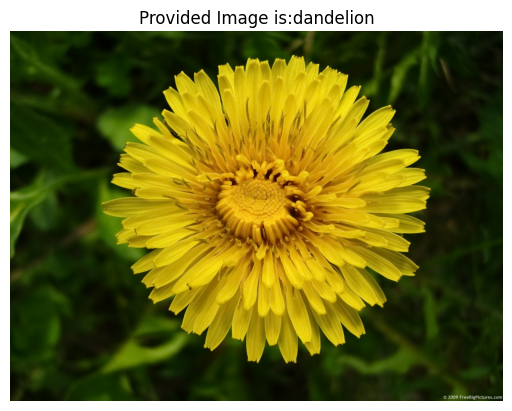

In [11]:
import numpy as np 
image_array=np.array(image)
plt.imshow(image_array)
plt.title(f'Provided Image is:{predicted_class_label}')
plt.axis("off")

In [12]:
def predict(image):
    transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

    image=Image.open(image)
    input_tensor=transform(image).unsqueeze(0)
    print(input_tensor.shape)
    with torch.no_grad():
        model_output=model(input_tensor)

    _,predicted=torch.max(model_output,1)
    
    classs_labels=["daisy","dandelion"]
    predicted_class_label=classs_labels[predicted.item()]

    print(f'Predicted Class Label is:{predicted_class_label}')
    
    import numpy as np 
    image_array=np.array(image)
    plt.imshow(image_array)
    plt.title(f'Provided Image is:{predicted_class_label}')
    plt.axis("off")
    

torch.Size([1, 3, 256, 256])
Predicted Class Label is:dandelion


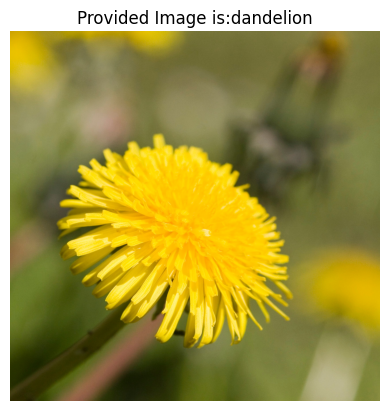

In [13]:
predict("test1.jpg")